In [30]:
import selection_sort as selection
import heap_sort as heap
import merge_sort as merge
import quick_sort as quick
import insertion_sort as insert
import random
from timeit import Timer

In [31]:
def crear_listas_con_10k_elementos(N):
    lista = list()
    for i in range(N):
        set1 = list(range(10000))
        random.shuffle(set1)
        lista.append(set1)
    return lista

In [32]:
## item b)
sets_datos = crear_listas_con_10k_elementos(10)
#defino la cantidad de elementos que quiero hacer
cantidad_de_elementos_set = [50, 100, 500, 1000, 2000, 3000, 4000, 5000, 7500, 10000]
lista_algoritmos = [heap.heap_sort, selection.selection_sort, merge.merge_sort, quick.quick_sort, insert.insertion_sort]

resultados = {}

In [33]:
conjunto = 0;
for set_actual in sets_datos:
    resultados_por_cantidad_elementos = {}
    for i in cantidad_de_elementos_set:
        lista_resultados_por_algoritmo = list()
        resultados_por_set = {}
        # agarro y a cada algoritmo de la lista lista_algoritmos le tomo el tiempo
        # que tarda en ordenar la lista en set_actual
        for f in lista_algoritmos:
            parametro_lista = set_actual[:i]
            t = Timer(lambda: f(parametro_lista))
            tiempo = t.timeit(1)
            lista_resultados_por_algoritmo.append(tiempo)
        resultados_por_cantidad_elementos[i] = lista_resultados_por_algoritmo
    # guardo todos los resultados de cada conjunto de datos para cada cantidad de elementos para cada algoritmo
    resultados[conjunto] = resultados_por_cantidad_elementos
    conjunto += 1

In [57]:
## item c)
tiempos_medio_algoritmo_rango = {}

for i in resultados.keys(): 
    print ('#### Set' + str(i))
    for j in resultados[i].keys():
        print ('**Cantidad de elementos: ' + str(j) + '**')
        print ('| Algoritmo | Tiempo de ejecución (s) |')
        print ('|-----------|-------------------------|')
        print ('| Heapsort  | ' + str(resultados[i][j][0]) + ' |')
        print ('| Selección | ' + str(resultados[i][j][1]) + ' |')
        print ('| MergeSort | ' + str(resultados[i][j][2]) + ' |')
        print ('| Quicksort | ' + str(resultados[i][j][3]) + ' |')
        print ('| Inserción | ' + str(resultados[i][j][4]) + ' |')
        if i == 0:
            tiempos_medio_algoritmo_rango[j] = {
                'heapsort': resultados[i][j][0],
                'selectionsort' : resultados[i][j][1],
                'mergesort': resultados[i][j][2],
                'quicksort': resultados[i][j][3],
                'insertion': resultados[i][j][4]
            }
        else:
            tiempos_medio_algoritmo_rango[j] = {
                'heapsort': (tiempos_medio_algoritmo_rango[j]['heapsort'] + resultados[i][j][0])*.5,
                'selectionsort' : (tiempos_medio_algoritmo_rango[j]['selectionsort'] + resultados[i][j][1])*.5,
                'mergesort': (tiempos_medio_algoritmo_rango[j]['mergesort'] + resultados[i][j][2])*.5,
                'quicksort': (tiempos_medio_algoritmo_rango[j]['quicksort'] + resultados[i][j][3])*.5,
                'insertion': (tiempos_medio_algoritmo_rango[j]['insertion'] + resultados[i][j][4])*.5
            }

#### Set0
**Cantidad de elementos: 50**
| Algoritmo | Tiempo de ejecución (s) |
|-----------|-------------------------|
| Heapsort  | 0.00036444700072024716 |
| Selección | 0.00014536199978465447 |
| MergeSort | 0.00038026299989724066 |
| Quicksort | 0.00022003699996275827 |
| Inserción | 0.00020109799970668973 |
**Cantidad de elementos: 100**
| Algoritmo | Tiempo de ejecución (s) |
|-----------|-------------------------|
| Heapsort  | 0.0013417600002867403 |
| Selección | 0.0008998510002129478 |
| MergeSort | 0.0009564530000716331 |
| Quicksort | 0.00027484500060381833 |
| Inserción | 0.0004023749997941195 |
**Cantidad de elementos: 500**
| Algoritmo | Tiempo de ejecución (s) |
|-----------|-------------------------|
| Heapsort  | 0.005462087999148935 |
| Selección | 0.012406216000272252 |
| MergeSort | 0.0033275269997830037 |
| Quicksort | 0.001671993999480037 |
| Inserción | 0.01129564299935737 |
**Cantidad de elementos: 1000**
| Algoritmo | Tiempo de ejecución (s) |
|-----------|--

In [59]:
## item d)
for t in tiempos_medio_algoritmo_rango.keys():
    print ('#### Tiempo medio con ' + str(t) + ' iteraciones: ')
    print ('| Algoritmo | Tiempo medio (seg) |')
    print ('|-----------|--------------------|')
    print ('| Heapsort  | ' + str(tiempos_medio_algoritmo_rango[t]['heapsort']) + ' |')
    print ('| Selección | ' + str(tiempos_medio_algoritmo_rango[t]['selectionsort'])+ ' |')
    print ('| Mergesort | ' + str(tiempos_medio_algoritmo_rango[t]['mergesort']) + ' |')
    print ('| Quicksort | ' + str(tiempos_medio_algoritmo_rango[t]['quicksort']) + ' |')
    print ('| Inserción | ' + str(tiempos_medio_algoritmo_rango[t]['insertion']) + ' |')

#### Tiempo medio con 50 iteraciones: 
| Algoritmo | Tiempo medio (seg) |
|-----------|--------------------|
| Heapsort  | 0.0003298004807970045 |
| Selección | 0.00013083834977933861 |
| Mergesort | 0.00023580199998107787 |
| Quicksort | 0.00012194083406313894 |
| Inserción | 0.00010067983583716966 |
#### Tiempo medio con 100 iteraciones: 
| Algoritmo | Tiempo medio (seg) |
|-----------|--------------------|
| Heapsort  | 0.0007247297246397721 |
| Selección | 0.0004486266798213734 |
| Mergesort | 0.00047982986346184475 |
| Quicksort | 0.0002497603338049714 |
| Inserción | 0.0003789045405540037 |
#### Tiempo medio con 500 iteraciones: 
| Algoritmo | Tiempo medio (seg) |
|-----------|--------------------|
| Heapsort  | 0.004888808857476334 |
| Selección | 0.011094667812789893 |
| Mergesort | 0.002757735193334554 |
| Quicksort | 0.001501715076367205 |
| Inserción | 0.01042211682185723 |
#### Tiempo medio con 1000 iteraciones: 
| Algoritmo | Tiempo medio (seg) |
|-----------|-------------

heapsort
selectionsort
mergesort
quicksort
insertion


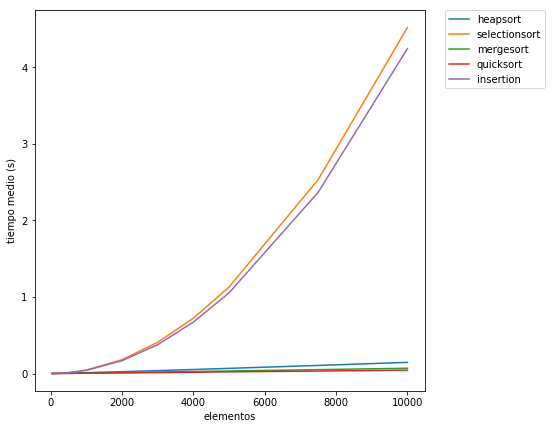

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#grafico los tiempos medios para cada algoritmo
algoritmos_x = {}
algoritmos_y = {}
for t in tiempos_medio_algoritmo_rango.keys():
    #print ('t ' + str(t))
    for alg in tiempos_medio_algoritmo_rango[t].keys():
        algoritmos_x[alg] = list()    
        algoritmos_y[alg] = list()
        
for t in tiempos_medio_algoritmo_rango.keys():
    for alg in tiempos_medio_algoritmo_rango[t].keys():
        algoritmos_x[alg].append(t)
        algoritmos_y[alg].append(tiempos_medio_algoritmo_rango[t][alg])
    #print ('tiempo medio con ' + str(t) + ' iteraciones: ')
    #print ('\t heapsort: ' + str(tiempos_medio_algoritmo_rango[t]['heapsort']))
    #print ('\t selectionsort: ' + str(tiempos_medio_algoritmo_rango[t]['selectionsort']))
    #print ('\t mergesort: ' + str(tiempos_medio_algoritmo_rango[t]['mergesort']))
    #print ('\t quicksort: ' + str(tiempos_medio_algoritmo_rango[t]['quicksort']))
plt.figure(figsize=(7,7))
for alg in algoritmos_x.keys():
    print(alg)
    #print(algoritmos_x[alg])
    #print(algoritmos_y[alg])
    plt.plot(algoritmos_x[alg], algoritmos_y[alg], label=alg)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('elementos')   
plt.ylabel('tiempo medio (s)')   
plt.show()
        
        
    #algoritmo1_y.append(tiempos_medio_algoritmo_rango[t]['heapsort'])
    #print ([t,tiempos_medio_algoritmo_rango[t]['heapsort']])
# tendria que agarrar un algoritmo y graficar todos sus tiempos

#plt.plot(algoritmo1_x, algoritmo1_y)
#plt.xlabel('iteraciones')
#plt.ylabel('tiempo medio')
#plt.show()

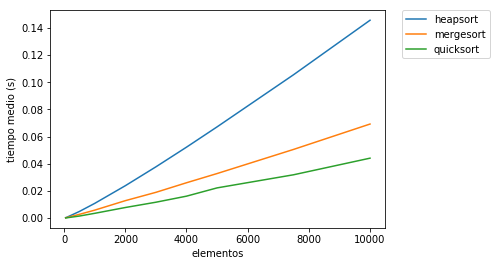

In [36]:
## ahora muestro para todos los casos el tiempo de mergesort, quicksort y heapsort
for alg in algoritmos_x.keys():
    #print(alg)
    if (alg == 'insertion' or alg == 'selectionsort'):
        continue
    #print(algoritmos_x[alg])
    #print(algoritmos_y[alg])
    plt.plot(algoritmos_x[alg], algoritmos_y[alg], label=alg)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('elementos')   
plt.ylabel('tiempo medio (s)')   
plt.show()

In [45]:
## peor caso de mergesort
resultados_por_cantidad_elementos = list()

for set_actual in cantidad_de_elementos_set:
    elementos = list(range(set_actual))
    elementos_pares = list(filter(lambda x: x % 2 == 0, elementos))
    elementos_impares = list(filter(lambda x: x % 2 != 0, elementos))
    #random.shuffle(elementos_pares)
    #random.shuffle(elementos_impares)
    ordenar = elementos_pares + elementos_impares
    t = Timer(lambda: merge.merge_sort(ordenar))
    tiempo = t.timeit(1)
    resultados_por_cantidad_elementos.append(tiempo)

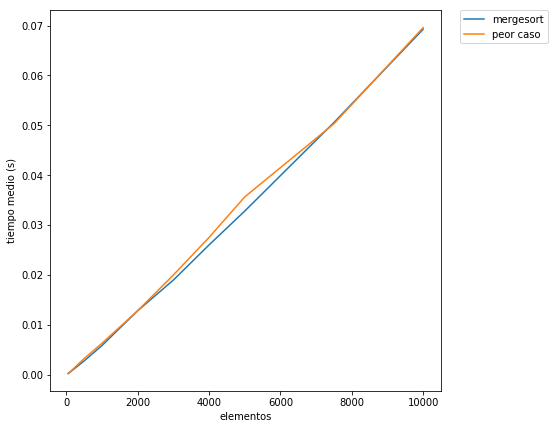

In [46]:
## comparo con el comun (mergesort)
plt.figure(figsize=(7,7))
for alg in algoritmos_x.keys():
    #print(alg)
    if (alg != 'mergesort'):
        continue
    #print(algoritmos_x[alg])
    #print(algoritmos_y[alg])
    plt.plot(algoritmos_x[alg], algoritmos_y[alg], label=alg)
    plt.plot(algoritmos_x[alg], resultados_por_cantidad_elementos, label='peor caso')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
plt.xlabel('elementos')   
plt.ylabel('tiempo medio (s)')   
plt.show()

In [47]:
## peor caso de quicksort
resultados_por_cantidad_elementos = list()

for set_actual in cantidad_de_elementos_set:
    elementos = list(range(set_actual))
    t = Timer(lambda: quick.quick_sort(elementos))
    tiempo = t.timeit(1)
    resultados_por_cantidad_elementos.append(tiempo)

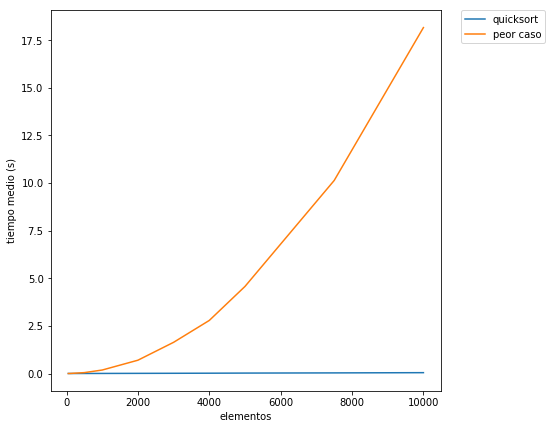

In [48]:
## comparo con el comun (quicksort)
plt.figure(figsize=(7,7))
for alg in algoritmos_x.keys():
    #print(alg)
    if (alg != 'quicksort'):
        continue
    #print(algoritmos_x[alg])
    #print(algoritmos_y[alg])
    plt.plot(algoritmos_x[alg], algoritmos_y[alg], label=alg)
    plt.plot(algoritmos_x[alg], resultados_por_cantidad_elementos, label='peor caso')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
plt.xlabel('elementos')   
plt.ylabel('tiempo medio (s)')   
plt.show()

In [51]:
## peor caso de heapsort
resultados_por_cantidad_elementos = list()

for set_actual in cantidad_de_elementos_set:
    elementos = list(range(set_actual))
    t = Timer(lambda: heap.heap_sort(elementos))
    tiempo = t.timeit(1)
    resultados_por_cantidad_elementos.append(tiempo)

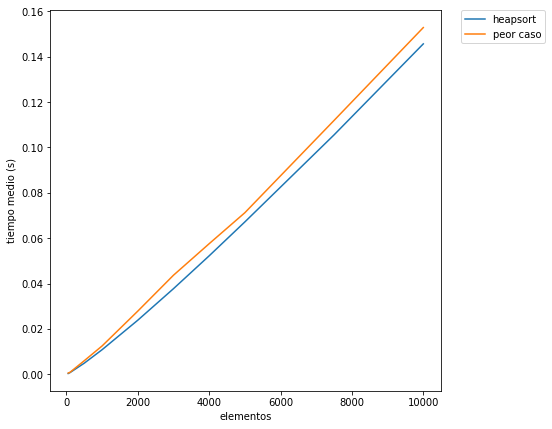

In [52]:
## comparo con el comun (heapsort)
plt.figure(figsize=(7,7))
for alg in algoritmos_x.keys():
    #print(alg)
    if (alg != 'heapsort'):
        continue
    #print(algoritmos_x[alg])
    #print(algoritmos_y[alg])
    plt.plot(algoritmos_x[alg], algoritmos_y[alg], label=alg)
    plt.plot(algoritmos_x[alg], resultados_por_cantidad_elementos, label='peor caso')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
plt.xlabel('elementos')   
plt.ylabel('tiempo medio (s)')   
plt.show()

In [62]:
## peor caso de insercion
resultados_por_cantidad_elementos = list()

for set_actual in cantidad_de_elementos_set:
    elementos = list(reversed(range(set_actual)))
    t = Timer(lambda: insert.insertion_sort(elementos))
    tiempo = t.timeit(1)
    resultados_por_cantidad_elementos.append(tiempo)

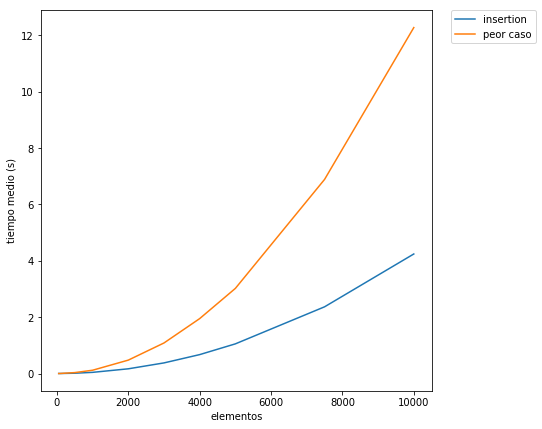

In [63]:
## comparo con el comun (insercion)
plt.figure(figsize=(7,7))
for alg in algoritmos_x.keys():
    #print(alg)
    if (alg != 'insertion'):
        continue
    #print(algoritmos_x[alg])
    #print(algoritmos_y[alg])
    plt.plot(algoritmos_x[alg], algoritmos_y[alg], label=alg)
    plt.plot(algoritmos_x[alg], resultados_por_cantidad_elementos, label='peor caso')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
plt.xlabel('elementos')   
plt.ylabel('tiempo medio (s)')   
plt.show()